<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Muskan/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("All pkgs have been imported successfully.")

All pkgs have been imported successfully.


In [4]:
dfXRP = pd.read_csv("XRP.csv")
print("Displaying dataset")
dfXRP

Displaying dataset


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570
...,...,...,...,...,...,...,...
832,2016-12-27,0.006326,0.006188,0.006326,0.006199,2471000,0.006199
833,2016-12-28,0.006336,0.006126,0.006193,0.006173,2064130,0.006173
834,2016-12-29,0.006354,0.006167,0.006180,0.006341,1345050,0.006341
835,2016-12-30,0.006455,0.006338,0.006352,0.006426,1379470,0.006426


In [5]:
print("Display detailed info about the dataset")
dfXRP.info()

Display detailed info about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       837 non-null    object 
 1   High       837 non-null    float64
 2   Low        837 non-null    float64
 3   Open       837 non-null    float64
 4   Close      837 non-null    float64
 5   Volume     837 non-null    int64  
 6   Adj Close  837 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 45.9+ KB


In [6]:
nRow,nCol = dfXRP.shape

nRow, nCol = dfXRP.shape
print("Number of columns in the dataset =",nCol)
print("Number of rows in the dataset    =",nRow)
print("Is there any null value in the dataset ?",dfXRP.isnull().values.any())

Number of columns in the dataset = 7
Number of rows in the dataset    = 837
Is there any null value in the dataset ? False


In [7]:
print("Display a column-wise null value count\n")
dfXRP.isnull().sum()

Display a column-wise null value count



Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
print("Getting rid of the null data")
dfXRP.dropna(inplace=True)
dfXRP.head()

Getting rid of the null data


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570


In [9]:
print("Number of null values dropped =",nRow - len(dfXRP))

Number of null values dropped = 0


In [10]:
datesLen = nRow
datesArr = []
datesArr = [1 for i in range(datesLen)]

for i in range(0,837):
    datesArr[i] = i+1
    
x = dfXRP['Open'].values
x1 = dfXRP['Close'].values
x2 = dfXRP['High'].values
x3 = dfXRP['Low'].values

print("These are the open values")
print(x,"\n")

print("These are the close values")
print(x1,"\n")

print("These are the high values")
print(x2,"\n")

print("These are the low values")
print(x3,"\n")

print("These are the volume XRP values")

y = dfXRP['Volume'].values
print(y,"\n")

print("These are the adjusted close values")

y1 = dfXRP['Adj Close'].values
print(y1,"\n")

These are the open values
[0.00512251 0.00539815 0.00513386 0.00494179 0.00476827 0.00456111
 0.0046552  0.00460974 0.00466996 0.00472183 0.00460747 0.00470576
 0.00527948 0.00470523 0.00464498 0.00475516 0.00487602 0.00502388
 0.00493456 0.00477738 0.00473096 0.00476936 0.00478738 0.00482412
 0.0048732  0.00475445 0.00485316 0.00479398 0.00487182 0.00482495
 0.00485525 0.00490429 0.0049642  0.00494538 0.00507192 0.00518983
 0.00518517 0.00514275 0.00508271 0.00471978 0.00454632 0.00489044
 0.00484033 0.00477433 0.00488716 0.00486518 0.00467368 0.0046584
 0.00480949 0.00480606 0.0048611  0.00487793 0.00487686 0.00490441
 0.00491962 0.00489649 0.00489665 0.00512798 0.00502243 0.00520626
 0.00503916 0.00518078 0.00533749 0.00542353 0.00569267 0.00607171
 0.00659095 0.00766919 0.00859513 0.00856136 0.00974221 0.011004
 0.014201   0.0151604  0.0139772  0.0112038  0.0125865  0.0131643
 0.013137   0.0133362  0.0137713  0.014406   0.0147929  0.0134179
 0.0150706  0.0158852  0.0163741  0.01637

In [12]:
stdDevArray = [0 for i in range(nRow)]
annualVolatility = [0 for i in range(nRow)]
numberOfDays = 252*(nRow/365) #this is scaled since 252 days is the number of tradeable days per year. Find the number of years this data took place and
#scale accordingly

for i in range(1,len(x1)):
    stdDevArray[i-1] = ((x1[i]/x1[i-1]) - 1)
    annualVolatility[i-1] = stdDevArray[i-1]*np.sqrt(numberOfDays)

Text(0.5, 1.0, 'Prices of XRP over time')

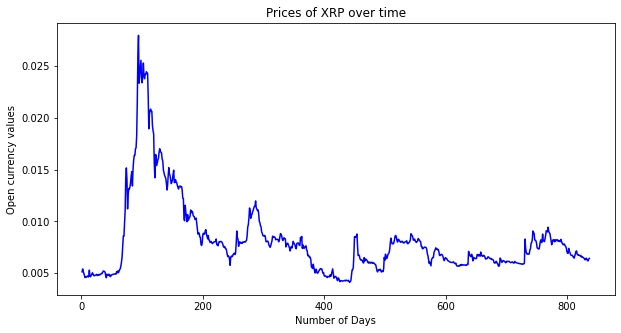

In [13]:
plt.figure(figsize=(10,5))
plt.plot(datesArr,x, color='blue')
plt.ylabel("Open currency values")
plt.xlabel("Number of Days")
plt.title("Prices of XRP over time")

Text(0.5, 1.0, 'Closing Prices of XRP charted over time')

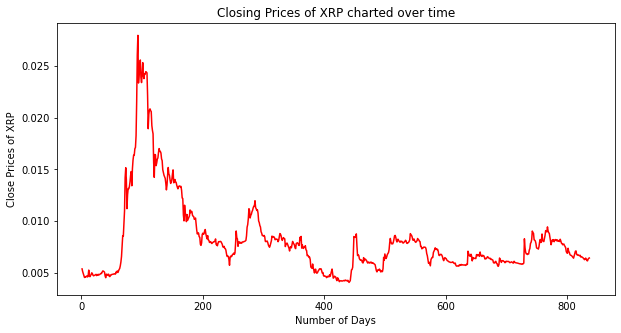

In [14]:
plt.figure(figsize=(10,5))
plt.plot(datesArr,x1, color='red')
plt.xlabel("Number of Days")
plt.ylabel("Close Prices of XRP")
plt.title("Closing Prices of XRP charted over time")

Text(0.5, 1.0, 'Composite Graph of XRP prices charted over time')

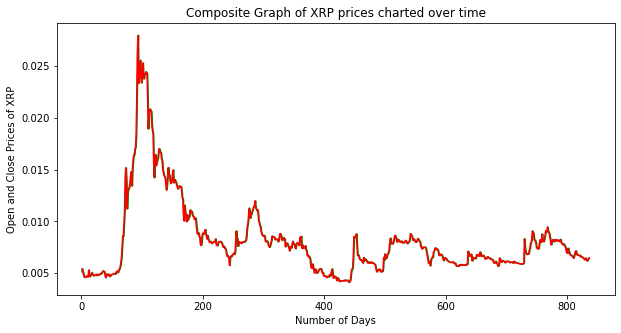

In [15]:
plt.figure(figsize=(10,5))
plt.plot(datesArr,x, color='green')
plt.plot(datesArr,x1, color='red')
plt.xlabel("Number of Days")
plt.ylabel("Open and Close Prices of XRP")
plt.title("Composite Graph of XRP prices charted over time")

Text(0.5, 0.98, 'Prices and Volatility of vs. Time')

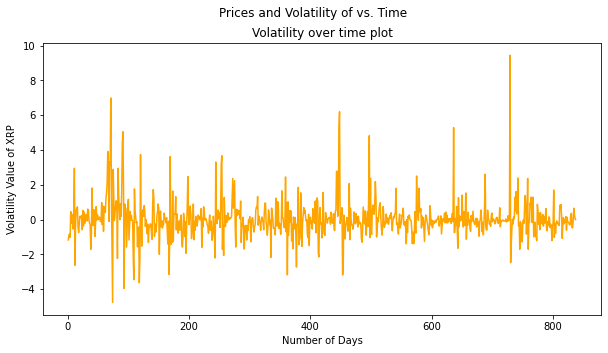

In [16]:
plt.figure(figsize=(10,5))
plt.plot(datesArr,annualVolatility, color='orange')
plt.xlabel("Number of Days")
plt.ylabel("Volatility Value of XRP")
plt.title("Volatility over time plot")
plt.suptitle("Prices and Volatility of vs. Time")

In [18]:
from fbprophet import Prophet
dfXRP.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570


In [19]:
dfXRP['Date'] = pd.to_datetime(dfXRP['Date'])
dfXRP_sort = dfXRP.sort_values('Date')
dfXRP_sort

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,0.005803,0.005123,0.005123,0.005399,1281960,0.005399
1,2014-09-17,0.005521,0.005091,0.005398,0.005135,491147,0.005135
2,2014-09-18,0.005167,0.004873,0.005134,0.004942,407109,0.004942
3,2014-09-19,0.004954,0.004736,0.004942,0.004772,322621,0.004772
4,2014-09-20,0.004791,0.004540,0.004768,0.004570,309571,0.004570
...,...,...,...,...,...,...,...
832,2016-12-27,0.006326,0.006188,0.006326,0.006199,2471000,0.006199
833,2016-12-28,0.006336,0.006126,0.006193,0.006173,2064130,0.006173
834,2016-12-29,0.006354,0.006167,0.006180,0.006341,1345050,0.006341
835,2016-12-30,0.006455,0.006338,0.006352,0.006426,1379470,0.006426


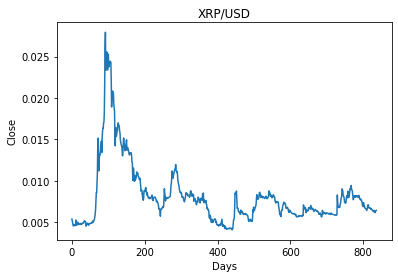

In [20]:
close = dfXRP_sort['Close']
ax = close.plot(title='XRP/USD')
ax.set_xlabel('Days')
ax.set_ylabel('Close')
plt.show()

In [21]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.2
dfXRP_sort["Date"] = pd.to_datetime(dfXRP["Date"], infer_datetime_format=True)
dfXRP_sort = dfXRP_sort[["Date", "Close"]]
dfXRP_sort = dfXRP_sort.rename(columns={"Date" : "ds", "Close" : "y" })
dfXRP_sort

,ds,y
0,2014-09-16,0.005399
1,2014-09-17,0.005135
2,2014-09-18,0.004942
3,2014-09-19,0.004772
4,2014-09-20,0.004570
...,...,...
832,2016-12-27,0.006199
833,2016-12-28,0.006173
834,2016-12-29,0.006341
835,2016-12-30,0.006426


In [22]:
model = Prophet(weekly_seasonality=True,daily_seasonality=True)
model.fit(dfXRP_sort)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1195,2017-12-27,0.002985,-0.012510,0.018710
1196,2017-12-28,0.003010,-0.012318,0.018545
1197,2017-12-29,0.002855,-0.012405,0.018275
1198,2017-12-30,0.002659,-0.012873,0.017846
1199,2017-12-31,0.002436,-0.012577,0.017831


In [23]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-16,0.004478,0.000476,0.004308,0.004478,0.004478,-0.002083,-0.002083,-0.002083,-0.003388,-0.003388,-0.003388,-0.000065,-0.000065,-0.000065,0.001371,0.001371,0.001371,0.0,0.0,0.0,0.002395
1,2014-09-17,0.004609,0.000562,0.004544,0.004609,0.004609,-0.001974,-0.001974,-0.001974,-0.003388,-0.003388,-0.003388,-0.000013,-0.000013,-0.000013,0.001427,0.001427,0.001427,0.0,0.0,0.0,0.002635
2,2014-09-18,0.004740,0.000844,0.004972,0.004740,0.004740,-0.001809,-0.001809,-0.001809,-0.003388,-0.003388,-0.003388,0.000107,0.000107,0.000107,0.001473,0.001473,0.001473,0.0,0.0,0.0,0.002932
3,2014-09-19,0.004872,0.001002,0.005173,0.004872,0.004872,-0.001811,-0.001811,-0.001811,-0.003388,-0.003388,-0.003388,0.000070,0.000070,0.000070,0.001507,0.001507,0.001507,0.0,0.0,0.0,0.003060
4,2014-09-20,0.005003,0.001183,0.005053,0.005003,0.005003,-0.001847,-0.001847,-0.001847,-0.003388,-0.003388,-0.003388,0.000012,0.000012,0.000012,0.001530,0.001530,0.001530,0.0,0.0,0.0,0.003156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2017-12-27,0.001410,-0.012510,0.018710,-0.013329,0.016746,0.001575,0.001575,0.001575,-0.003388,-0.003388,-0.003388,-0.000013,-0.000013,-0.000013,0.004977,0.004977,0.004977,0.0,0.0,0.0,0.002985
1196,2017-12-28,0.001392,-0.012318,0.018545,-0.013448,0.016799,0.001617,0.001617,0.001617,-0.003388,-0.003388,-0.003388,0.000107,0.000107,0.000107,0.004899,0.004899,0.004899,0.0,0.0,0.0,0.003010
1197,2017-12-29,0.001374,-0.012405,0.018275,-0.013568,0.016845,0.001481,0.001481,0.001481,-0.003388,-0.003388,-0.003388,0.000070,0.000070,0.000070,0.004799,0.004799,0.004799,0.0,0.0,0.0,0.002855
1198,2017-12-30,0.001356,-0.012873,0.017846,-0.013688,0.016832,0.001302,0.001302,0.001302,-0.003388,-0.003388,-0.003388,0.000012,0.000012,0.000012,0.004679,0.004679,0.004679,0.0,0.0,0.0,0.002659


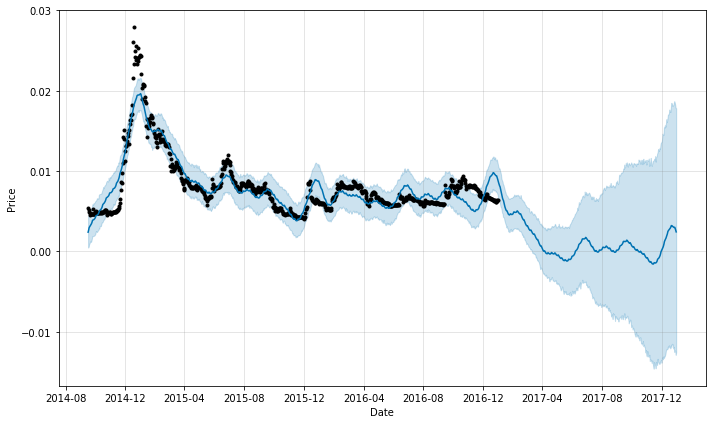

In [30]:

graph = model.plot(forcast, xlabel="Date", ylabel="Price")
